<a href="https://colab.research.google.com/github/sun9huni/first-repository/blob/main/Day3_%EC%B6%94%EB%A1%A0%ED%86%B5%EA%B3%84%EC%8B%AC%ED%99%94(A_B_test)_c_%EA%B9%80%EC%84%B1%ED%9B%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 대수의 법칙
- 동전던지기의 예시에서 시행이 많아질수록 비율(평균)은 이론적인 수치인 0.5에 가까워짐

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

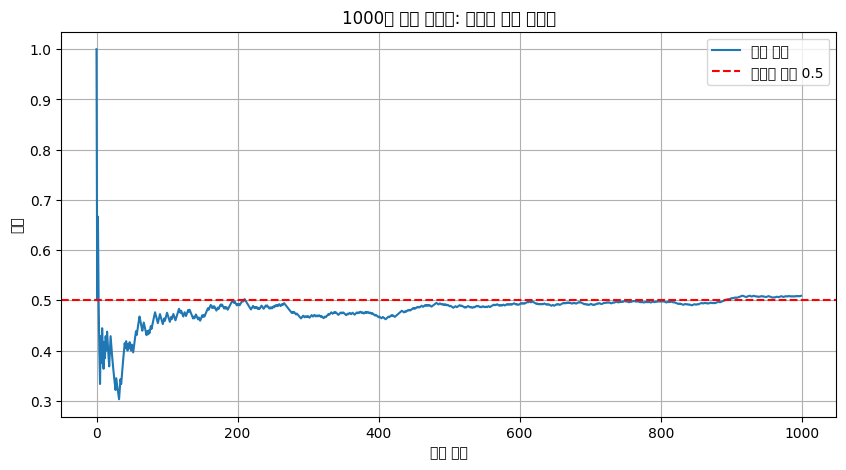

In [2]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

def law_of_large_numbers(trials):
    # 동전 던지기 시행: 성공확률 p = 0.5

    outcomes = bernoulli.rvs(p = 0.5, size = trials)

    # 누적 평균 계산

    cumulative_average = np.cumsum(outcomes) / np.arange(1, trials + 1)

    # 시각화
    plt.figure(figsize = (10, 5))
    plt.plot(cumulative_average, label = '누적 평균')
    plt.axhline(0.5, color = 'red', linestyle = '--', label = '이론적 확률 0.5')
    plt.title(f'{trials}번 동전 던지기: 대수의 법칙 시각화')
    plt.xlabel('시행 횟수')
    plt.ylabel('평균')
    plt.legend()
    plt.grid(True)
    plt.show()

# 1,000번의 시행

law_of_large_numbers(1000)


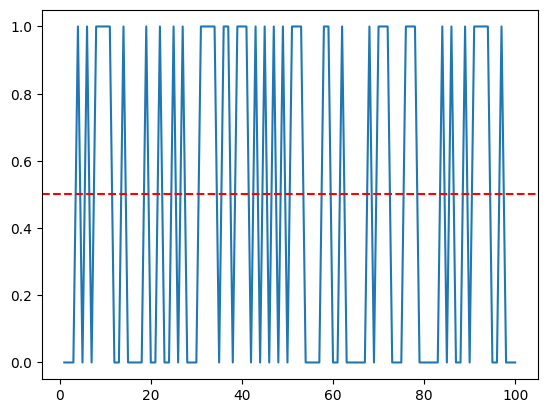

In [109]:
from scipy.stats import bernoulli

def law_of_large_numbers(trials=100):
  propotions = []
  n_trials = trials
  for i in range(1,n_trials + 1):
   flips = bernoulli.rvs(p = 0.5, size = 1)
   propotions.append(flips.mean())

plt.plot(range(1,n_trials + 1), propotions)
plt.axhline( y = 0.5, color = 'r', linestyle = '--')


law_of_large_numbers(1000)



### 중심극한정리(CLT, Central Limit Theory)
- 어떤 분포이던 표본추출한 통계량(ex 평균)은 정규분포를 따른다는 중심극한정리를 데이터로 재현해봅시다.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from scipy import stats
from scipy.stats import binom, uniform, norm

#### Q1) CLT: 데이터 생성(하위 문제4개)

-  scipy.stats 모듈에서 다음 분포를 생성하고 히스토그램으로 표현하기(subplots권장)

- Q1-1) 이항 분포 샘플 변수명 `binomial_data`: 확률 0.5의 시행을 10번 시행했을때 성공할 갯수의 1000개의 표본
    - ex 동전 10번 던졌을때 앞면이 나올 수 있는 수는 0부터 10개
- Q1-2) 균등 분포 샘플 변수명 `uniform_data` : 시작 0, 끝 10의 표본 1000개 생성
- Q1-3) 정규 분포 샘플 변수명 `normal_data` :  평균0, 표준편차 1의 표본 1000개 생성
- Q1-4) 위 데이터들을 히스토그램으로 표현하되 plt.subplots(1,3)을 이용하여 동시에 표현하고, `bins`는 20개로 설정

이항분포 데이터의 예시 [4 8 6 5 3]
균등분포 데이터의 예시 [1.85132929 5.41900947 8.72945836 7.32224886 8.06561148]
정규분포 데이터의 예시 [-0.87798259 -0.82688035 -0.22647889  0.36736551  0.91358463]


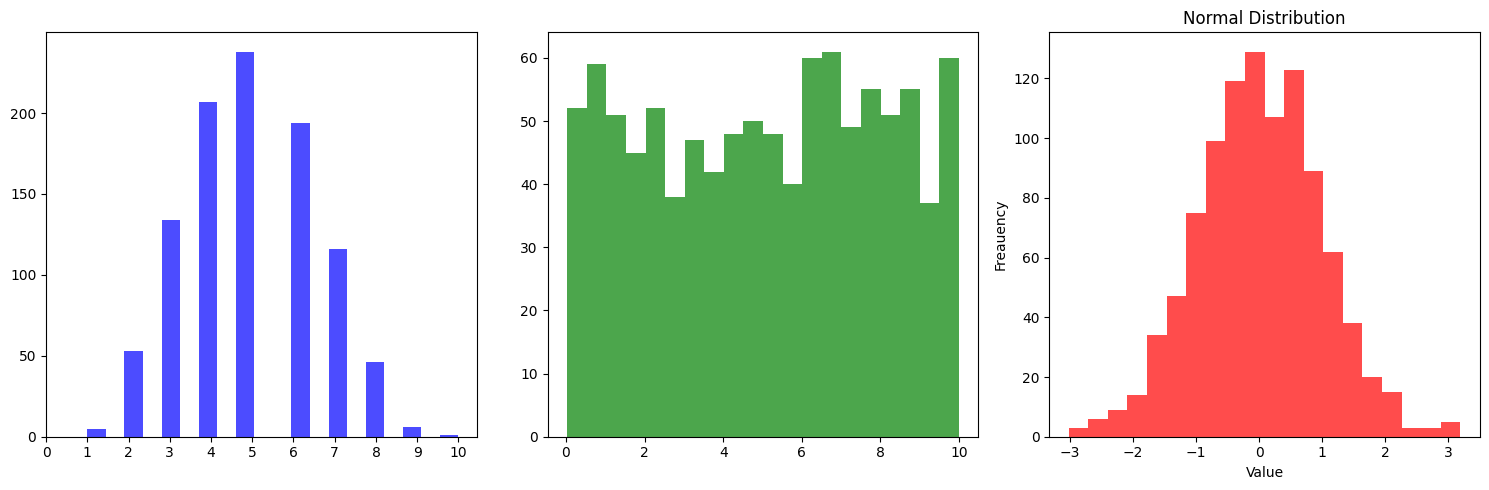

In [26]:
np.random.seed(42)

# scipy를 통한 샘플 생성

size = 1000
n = 10
p = 0.5

# 이항분포 데이터
binomial_data = binom.rvs(n, p, size = size)
# 균등분포 데이터
uniform_data = uniform.rvs(loc=0, scale=10, size = size,)
# 정규분포 데이터
normal_data = norm.rvs(loc = 0, scale = 1, size = size)



print(f'이항분포 데이터의 예시 {binomial_data[:5]}')
print(f'균등분포 데이터의 예시 {uniform_data[:5]}')
print(f'정규분포 데이터의 예시 {normal_data[:5]}')

#시각화
plt.figure(figsize=(15, 5))

# 서브플랏에 행, 열, 인덱스
plt.subplot(1, 3, 1)
plt.hist(binomial_data, bins = 20, color = 'blue', alpha = 0.7)
plt.xticks(range(0,11))

plt.subplot(1, 3, 2)
plt.hist(uniform_data, bins = 20, color = 'green', alpha = 0.7)


plt.subplot(1, 3, 3)
plt.hist(normal_data, bins = 20, color = 'red', alpha = 0.7 )
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Freauency")

plt.tight_layout()
plt.show()

#### Q2) CLT: 각 분포의 표본 평균 시각화
`Numpy.choice`함수를 이용하여 각 분포(ex `bionmial_data`에서 30개씩 뽑아 평균을 내고 이를 500번 반복하여 표본 평균을 생성해 봅시다. 표본의 평균들을 히스토그램으로 시각화여 정규분포를 따르는지 확인해 봅시다.

- `num_samples`: 표본추출할 횟수
- `sample_mean`: 딕셔너리 자료형으로 `Binomal`, `Uniform`, `Normal`의 Key값을 가지며 해당하는 values들은 각 30개씩 뽑은 평균 값을 저장. 이를 총 500번 진행

- 반복하기전에 단순하게 30개를 뽑아서 평균을 내는 방법
-  `np.random.choice`

In [9]:
np.random.choice(binomial_data[:5], size = 30, replace = True).mean()

np.float64(5.0)

In [27]:
import pandas as pd
pd.DataFrame(sample_means)

,Binomial,Uniform,Normal
0,4.800000,3.705917,0.074136
1,5.133333,5.133087,0.171111
2,4.533333,5.243719,0.134999
3,5.133333,4.139754,-0.065847
4,4.766667,5.568291,-0.125306
...,...,...,...
495,4.933333,5.319592,-0.143967
496,5.100000,5.421133,0.107088
497,4.766667,5.550078,0.223773
498,4.433333,4.539912,0.186796


이항분포 표본에서 30개씩 뽑아 평균을 낸 값 {'Binomial': [np.float64(4.8), np.float64(5.133333333333334), np.float64(4.533333333333333), np.float64(5.133333333333334), np.float64(4.766666666666667), np.float64(4.966666666666667), np.float64(5.033333333333333), np.float64(4.766666666666667), np.float64(5.133333333333334), np.float64(4.866666666666666), np.float64(4.433333333333334), np.float64(5.133333333333334), np.float64(5.1), np.float64(5.166666666666667), np.float64(4.8), np.float64(4.566666666666666), np.float64(5.166666666666667), np.float64(4.333333333333333), np.float64(5.366666666666666), np.float64(4.5), np.float64(4.4), np.float64(5.2), np.float64(4.333333333333333), np.float64(5.333333333333333), np.float64(5.0), np.float64(4.666666666666667), np.float64(5.0), np.float64(5.0), np.float64(5.033333333333333), np.float64(4.366666666666666), np.float64(5.166666666666667), np.float64(4.766666666666667), np.float64(4.733333333333333), np.float64(4.966666666666667), np.float64(5.3), np.float64(5.03

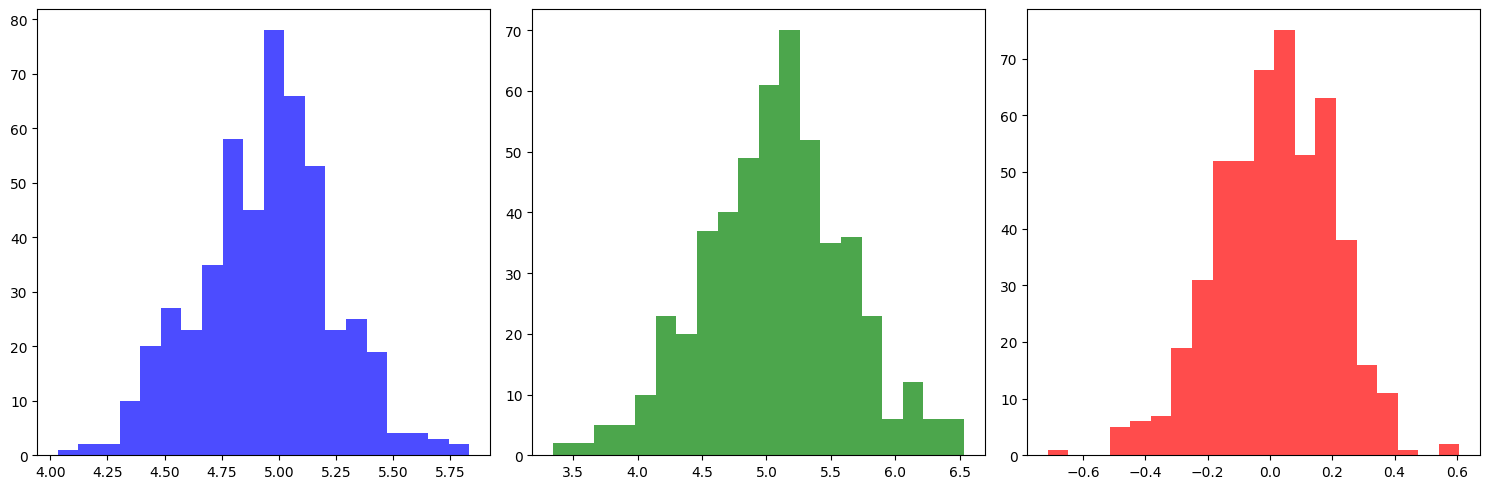

In [12]:
# 표본 추출할 횟수와 자료형(sample_mean)정의
num_samples = 500

# 사전 선언
sample_means=  {
'Binomial' : [],
'Uniform' : [],
'Normal' : []

}
#numpy.choice을 통해 샘플의 평균을 구하여 sample_means 딕셔너리 자료형에 각각 저장

for _ in range(num_samples):
    Binomial = np.random.choice(binomial_data, size=30, replace=True).mean()
    Uniform = np.random.choice(uniform_data, size=30, replace=True).mean()
    Normal = np.random.choice(normal_data, size=30, replace=True).mean()
    sample_means['Binomial'].append(Binomial)
    sample_means['Uniform'].append(Uniform)
    sample_means['Normal'].append(Normal)


print(f'이항분포 표본에서 30개씩 뽑아 평균을 낸 값 {sample_means}')

#시각화
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.hist(sample_means['Binomial'], bins = 20, color = 'blue', alpha =0.7)

plt.subplot(1,3,2)
plt.hist(sample_means['Uniform'], bins = 20, color = 'green', alpha =0.7)

plt.subplot(1,3,3)
plt.hist(sample_means['Normal'], bins = 20, color = 'red', alpha =0.7)

plt.tight_layout()
plt.show()

## 점추정과 구간추정

#### Q3) 점추정과 구간추정
- 다음과 같이 2가지의 표본데이터가 있다고 할때, 평균과 표준편차를 계산해보세요
- 히스토그램을 그려 평균이 같지만 분포는 다르다는 것을 보여주세요

- `mean1`, `std1`: 표본 1번의 통계량
- `mean2`, `std2`: 표본 2번의 통계량

In [29]:
import numpy as np
import matplotlib.pyplot as plt

data1 = [48, 49, 50, 51, 52, 47, 53, 49, 50, 51, 50, 49, 50, 51, 50, 48, 49, 51, 52, 50]  # Low variance
data2 = [30, 40, 50, 60, 70, 20, 80, 45, 55, 65, 35, 75, 25, 85, 50, 60, 40, 70, 20, 90]  # High variance

Data 1 평균 = 50.00, 표준편차 = 1.45
Data 2 평균 = 53.25, 표준편차 = 20.81


<ipython-input-30-10fdfbbae55b>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


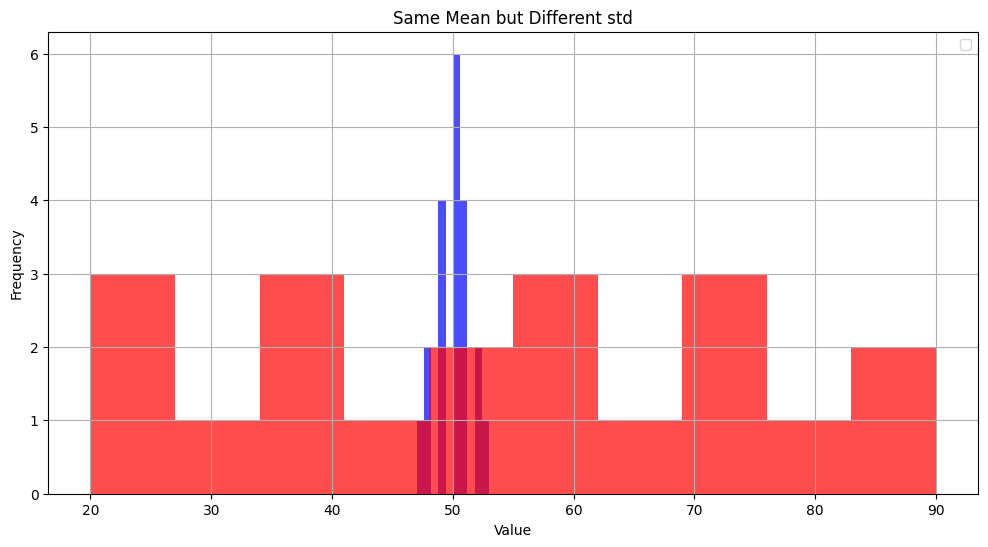

In [30]:
# 평균과 표준편차 계산

mean1 = np.mean(data1)
mean2 = np.mean(data2)
std1 = np.std(data1)
std2 = np.std(data2)


# 값 출력
print(f"Data 1 평균 = {mean1:.2f}, 표준편차 = {std1:.2f}")
print(f"Data 2 평균 = {mean2:.2f}, 표준편차 = {std2:.2f}")

# 히스토그램 그리기
plt.figure(figsize=(12, 6))

plt.hist(data1, color = 'blue', alpha = 0.7)
plt.hist(data2, color = 'red', alpha = 0.7)


plt.title("Same Mean but Different std")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

## 신뢰구간
- 다음은 한국남자의 키를 임의로 선택하여 표본을 생성하였다. 신뢰구간을 T분포기반과 부트스트랩 기반으로 구현해보자
- Hint) t통계량은 `stats.t.ppf`함수로 구현되어있음. Ex) 95%신뢰구간의 통계량 `stats.t.ppf(1.95/2, df = n-1)`

#### Q4) t분포 기반 신뢰구간계산

- Latex: 기호를 통해서 수식을 쓰는방법
- 모분산을 알때($\sigma$ Known)

- $\bar{x} - 1.96 * \frac{\sigma}{\sqrt(n)} <= \mu <= \bar{x} + 1.96 * \frac{\sigma}{\sqrt(n)}$

- 모분산을 모를때때($\sigma$ UnKnown)

- $\bar{x} -t_{\alpha/2, n-1} * \frac{\sigma}{\sqrt(n)} <= \mu <= \bar{x} + t_{\alpha/2, n-1}* \frac{\sigma}{\sqrt(n)}$

In [31]:
stats.t.ppf(0.975, 19)

np.float64(2.093024054408263)

In [63]:
import numpy as np
from scipy import stats

korean_men_heights = [
    170, 172, 174, 168, 176, 175, 169, 171, 173, 177,
    165, 180, 178, 174, 172, 173, 169, 168, 176, 175
]

In [68]:
# 표본 평균구하기
sample_mean = np.mean(korean_men_heights)
sample_std = np.std(korean_men_heights)

# 데이터사이즈
sample_size = len(korean_men_heights)
n = sample_size

# 표준오차 구하기(표준편차 나누기 데이터갯수의 제곱근)

standard_error = np.std(korean_men_heights) / np.sqrt(n)


# 95% 신뢰구간 구하기

confidence = stats.t.ppf(0.975, n-1)

margin_of_error = confidence * standard_error

confidence_interval = [0, 0]

confidence_interval[0] = sample_mean - margin_of_error
confidence_interval[1] = sample_mean + margin_of_error

# Print results
print("Point and Interval Estimation for Korean Men's Height:")
print(f"Sample Mean: {sample_mean:.2f} cm")
print(f"Sample Standard Deviation: {sample_std:.2f} cm")
print(f"Sample Size: {n}")
print(f"Standard Error: {standard_error:.2f} cm")
print(f"Margin of Error: {margin_of_error:.2f} cm")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

Point and Interval Estimation for Korean Men's Height:
Sample Mean: 172.75 cm
Sample Standard Deviation: 3.73 cm
Sample Size: 20
Standard Error: 0.83 cm
Margin of Error: 1.74 cm
95% Confidence Interval: (171.01, 174.49)


In [61]:
# 방법2
# 표본 평균
df_ = np.mean(korean_men_heights)
# 데이터 사이즈
sample_size = len(korean_men_heights)
# 표준오차
std_ = np.std(korean_men_heights) / np.sqrt(sample_size)

stats.t.interval(0.95, df = df_, loc = sample_mean, scale = std_  )

(np.float64(171.1052560294546), np.float64(174.3947439705454))

### Q5) 부트스트래핑 기반 신뢰구간
- `sample_mean`: 표본-평균
- `sample_std`: 표본-표준편차
- `n`: 표본의 갯수(20)
- `n_bootstraps`: 부트스트랩 표본의 갯수(10000)
- `bootstrap_means`: 부트스트랩 표본 갯수의 평균을 담을 리스트 자료형

In [82]:
# 평균과 표준편차
sample_mean = np.mean(korean_men_heights)
sample_std = np.std(korean_men_heights, ddof = 1)

# 부트스트래핑 파라미터 정하기

n_bootstraps = 10000
sample_size = 30

#부트스트래핑 시행

bootstrap_means = []
for _ in range(n_bootstraps):
  bootstrap_sample = np.random.choice(korean_men_heights, size=sample_size, replace=True)
  bootstrap_means.append(np.mean(bootstrap_sample))


# print(bootstrap_means[:5])

# 내 실패작
# boot_confidence = stats.t.ppf(0.95, n_bootstraps -1)
# boot_margin_of_error = boot_confidence * np.sqrt(n_bootstraps)


# bootstrap_confidence_interval = [0,0]
# bootstrap_confidence_interval[0] = bootstrap_means + boot_margin_of_error
# bootstrap_confidence_interval[0] = bootstrap_means - boot_margin_of_error


# 부트스트래핑으로 신뢰구간 구하기
# np.percentile을 활용하여 2.5%, 97.5%에 해당하는 값을 신뢰구간으로 설정
bootstrap_confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])


# 부트스트래핑으로 신뢰구간 구하기

# 결과출력
print("Bootstrap Confidence Interval for Korean Men's Height:")
print(f"Sample Mean: {sample_mean:.2f} cm")
print(f"Sample Standard Deviation: {sample_std:.2f} cm")
print(f"95% Confidence Interval (Bootstrap): ({bootstrap_confidence_interval[0]:.2f}, {bootstrap_confidence_interval[1]:.2f})")

Bootstrap Confidence Interval for Korean Men's Height:
Sample Mean: 172.75 cm
Sample Standard Deviation: 3.82 cm
95% Confidence Interval (Bootstrap): (171.40, 174.07)


In [49]:
(1- 0.95)/2 *100

2.500000000000002

In [50]:
(1+0.95)/2*100

97.5

In [53]:
np.percentile(bootstrap_means,0.025)

np.float64(165.0)

## 2. 검정실습

### Z검정

- 한 회사에서 고객 만족도 설문조사를 시행. 이전 설문조사 결과 평균 만족도가 8점(𝜇_0=8), 표준 편차는 1.5점(𝜎 = 1.5) 알려져있음.  새로운 서비스 도입 후 100명의 고객의 대상으로 표본 조사를 했더니 평균 만족도가 8.2점(𝑥 ̅ = 8.2). 새로운 서비스 정책이 고객의 만족도를 유의미하게 향상시켰는가?


- Z-score의 계산:  $\frac{\bar{x} - \mu_0}{\sigma /\sqrt(n)}$
- Z=1.33의 계산: `norm.cdf`이용
    - ex) norm.cdf(1.33): Z = 1.33까지의 누적확률

In [ ]:
# 방법론: 모표준편차를 안다 -> Z검정 , 일표본 검증(하나의 그룹이 특정 값을 갖는가)
# 가설
# H0: 서비스정책이 평점에 영향이 없다.
# H1: 정책에 영향이 있다.
# Z-score : 자연스럽게 결정되는 부분이라 함에 맡겨서 계산시킴

In [84]:
from scipy.stats import norm
import numpy as np

# 데이터 설정

mu = 8 # 모평균
sigma = 1.5
n = 100
x_bar = 8.2

# 표준오차 계산

SE = sigma / np.sqrt(n)

# Z-통계량 계산

z_stat = (x_bar - mu) /SE

# 양측 검정 p-value 계산
# cdf가 적분값인가??

p_value = 2*(1 - norm.cdf(abs(z_stat)))

# 결과 출력
print(f"Z-통계량: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# 유의수준 설정
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다. 새로운 정책이 만족도에 유의미한 영향을 미칩니다.")
else:
    print("귀무가설을 기각하지 못합니다. 새로운 정책이 만족도에 유의미한 영향을 미친다는 증거가 부족합니다.")

Z-통계량: 1.33
P-value: 0.1824
귀무가설을 기각하지 못합니다. 새로운 정책이 만족도에 유의미한 영향을 미친다는 증거가 부족합니다.


### Q6) Z검정
- 한 회사는 새로운 광고 캠페인의 효과를 평가하기위해서 실험을 진행했습니다. 이전 광고 캠패인의 평균 클릭율($\mu_0$)은 3%로 알려져 있으며, 표준편차($\sigma $)는 0.5%로 알려져 있습니다. 새로운 광고 캠페인을 통해 n= 200의 사용자 데이터를 수집한 결과 평균 클릭율($\bar{x}$)는 3.4%로 나타났습니다.
- 이 때 새로운 광고 캠페인이 클릭율에 유의미한 변화를 가져왔는지 양측 검증을 통해 분석하세요.

- `mu_0`: 이전 광고 캠페인 평균 클릭율
- `sigma`: 모집단 표준편차
- `n`: 표본의 크기
- `x_bar`: 새로운 광고 캠페인의 평균 클릭율

In [111]:
from scipy.stats import norm
import numpy as np

# 데이터 설정

mu_0 = 3
sigma = 0.5
n = 200
x_bar = 3.4


# 표준오차 계산

SE = sigma / np.sqrt(n)


# Z-통계량 계산

z_stat = (x_bar - mu) / SE

# 양측 검정 p-value 계산

p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# 결과 출력
print(f"Z-통계량: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# 유의수준 설정
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다. 새로운 광고 캠페인이 클릭율에 유의미한 변화를 가져왔습니다.")
else:
    print("귀무가설을 기각하지 못합니다. 새로운 광고 캠페인이 클릭율에 유의미한 변화를 가져왔다는 증거가 부족합니다.")

Z-통계량: -130.11
P-value: 0.0000
귀무가설을 기각합니다. 새로운 광고 캠페인이 클릭율에 유의미한 변화를 가져왔습니다.


### t검정: 독립 이표본
- 한 회사가 두가지 광고 캠페인(A,B)의 전환율(CVR)을 비교하고자 한다.

In [123]:
import numpy as np
from scipy.stats import ttest_ind
# 그룹 A와 그룹 B의 전환율 데이터
group_a = np.array([0.045, 0.052, 0.048, 0.055, 0.049, 0.051, 0.047, 0.053, 0.050, 0.046,
                   0.054, 0.049, 0.052, 0.048, 0.055, 0.051, 0.047, 0.053, 0.050, 0.046,
                   0.054, 0.049, 0.052, 0.048, 0.055, 0.051, 0.047, 0.053, 0.050, 0.046])

group_b = np.array([0.056, 0.060, 0.052, 0.058, 0.054, 0.057, 0.053, 0.059, 0.056, 0.052,
                   0.061, 0.055, 0.058, 0.054, 0.060, 0.057, 0.053, 0.059, 0.056, 0.052,
                   0.061, 0.055, 0.058, 0.054, 0.060, 0.057, 0.053, 0.059, 0.056, 0.052])


# 독립 이표본 t-테스트 수행

t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var = True)

# 등분산 가정

# 결과 출력
print(f"t-통계량: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 유의수준 설정
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹 간 평균에 통계적으로 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 기각하지 못합니다. 두 그룹 간 평균에 통계적으로 유의미한 차이가 있다는 증거가 부족합니다.")

t-통계량: -7.9099
p-value: 0.0000
귀무가설을 기각합니다. 두 그룹 간 평균에 통계적으로 유의미한 차이가 있습니다.


In [ ]:
np.mean(group_a), np.mean(group_b)

(0.0502, 0.05623333333333333)

### Q7) t검정

- 다음은 기존 페이지 A와 개선된 페이지 B에 대한 접속률을 측정한 abtest결과이다.
- t-test를 이용하여 두 페이지간 접속률의 차이가 있는지 검증하라
- `time_a`: 페이지 A의 데이터
- `time_b`: 페이지 B의 데이터

In [114]:
import pandas as pd
from scipy import stats
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/web_page_data.csv"
session_times = pd.read_csv(url)
session_times.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [127]:
time_a = session_times[session_times['Page'] == 'Page A']['Time']
time_b = session_times[session_times['Page'] == 'Page B']['Time']


t_statistic, p_value = stats.ttest_ind(time_a, time_b, equal_var = True)


# Print the results
print("T-statistic:", t_statistic.round(2))
print("P-value:", p_value.round(2))

T-statistic: -1.12
P-value: 0.27


### ABtest
- https://www.kaggle.com/datasets/zhangluyuan/ab-testing/data
- 신규 페이지에 따른 전환율이 유의미한 변화가 있는지 측정
- 변수 설명
    - 'user_id' contains user ids
    - 'timestamp' is about when a session was
    - 'group' contains 2 variables: control and treatment
    - 'landing_page' is about what version of a site a user saw
    - 'converted' says us about user's behavior: if a user made a purchase (1) or not (0)

In [85]:
import kagglehub
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
# Download latest version
path = kagglehub.dataset_download("zhangluyuan/ab-testing")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0])
df.head(3)

100%|██████████| 4.04M/4.04M [00:00<00:00, 165MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/zhangluyuan/ab-testing/versions/1


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [86]:
# pd.crosstab은 행렬을 만들어준다.
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


- 데이터 전처리
  - 한 유저가 여러번의 세션을 생성할 수 있음. 중복 제거
  - 대조군/처리군에 대해서 그룹을 나눔
  - 두 군에 대한 기술 통계
  - 최종적으로 barplot 확인, t test 실행

In [87]:
#현재 사이트의 전환율은 12%이고 14%로 올리고 싶다고 가정
#이를 통해 필요한 인구수를 계산

effect_size = sms.proportion_effectsize(0.12, 0.14)    # Calculating effect size based on our expected rates

required_n = sms.NormalIndPower().solve_power(
    effect_size,
    power=0.8,  #power of a test (defualt is 0.8)
    alpha=0.05, #p-value
    ratio=1
    )                                                  # Calculating sample size needed

required_n = ceil(required_n)                          # Rounding up to next whole number

print(required_n)

4433


In [91]:
control_group = df.query('group == "control"').sample(4433)
treatment_group = df.query('group == "treatment"').sample(4433)

display(control_group)
display(treatment_group)

,user_id,timestamp,group,landing_page,converted
291767,903866,2017-01-07 03:02:10.645599,control,old_page,0
216328,739028,2017-01-22 19:57:42.622241,control,old_page,0
219246,764939,2017-01-23 22:29:41.062197,control,old_page,0
232635,891322,2017-01-07 08:49:25.586132,control,old_page,0
64329,863844,2017-01-16 06:51:52.422791,control,old_page,0
...,...,...,...,...,...
133347,916408,2017-01-10 20:11:28.501841,control,old_page,0
137164,794313,2017-01-21 00:18:48.134413,control,old_page,0
149273,844765,2017-01-11 07:32:18.751233,control,old_page,0
29095,930030,2017-01-08 23:48:26.713866,control,old_page,0


,user_id,timestamp,group,landing_page,converted
114220,670986,2017-01-22 08:01:00.961318,treatment,new_page,0
161339,636426,2017-01-14 23:09:49.737930,treatment,new_page,0
98905,829548,2017-01-12 23:50:54.323112,treatment,new_page,1
92662,918767,2017-01-16 09:50:26.596795,treatment,old_page,0
174798,820933,2017-01-22 18:38:52.784853,treatment,new_page,1
...,...,...,...,...,...
236153,714085,2017-01-23 22:12:51.318438,treatment,new_page,0
26780,635921,2017-01-21 17:43:54.234984,treatment,new_page,0
129221,887512,2017-01-14 07:49:33.268096,treatment,new_page,0
55563,921501,2017-01-11 01:34:09.810154,treatment,new_page,0


In [107]:
ab_test = pd.concat([control_group, treatment_group]).reset_index(drop = True)
conversion_rates = ab_test.groupby('group')['converted']

std_p = lambda x : np.std(x, ddof = 1) # 표준편차
se_p = lambda x : stats.sem(x, ddof = 1) # 표준오차

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['cvr', 'std', 'se']
conversion_rates

<ipython-input-107-386c1f728f70>:7: FutureWarning: The provided callable <function mean at 0x7cfba030df80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])


,cvr,std,se
group,,,
control,0.113467,0.317199,0.004764
treatment,0.122265,0.327628,0.004921


In [ ]:
# 한 유저가 여러번의 세션을 생성할 수 있음. 중복제거
session_counts = df.user_id.value_counts()
double_users = session_counts[session_counts>1].index

double_users

In [ ]:
control_group = df.query('group == "control"').sample(required_n)
treatment_group = df.query('group == "treatment"').sample(required_n)

display(control_group.head())
display(treatment_group.head())

In [ ]:
ab_test = pd.concat([control_group, treatment_group], axis=0)
ab_test.reset_index(inplace=True, drop=True)
display(ab_test.head())
display(ab_test.group.value_counts())

In [ ]:
conversion_rates = ab_test.groupby('group')['converted']

std_p = lambda x: np.std(x, ddof=1)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=1)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']
conversion_rates.style.format('{:.3f}')

In [ ]:
sns.barplot(x=ab_test['group'], y=ab_test['converted'], ci=False)

plt.ylim(0, 0.15)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

In [ ]:
#실제로 유의미한 결과인지 확인
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_conversion = ab_test.query('group == "control"')['converted']
treatment_conversion = ab_test.query('group == "treatment"')['converted']

## 성공한 부분 성공 못한 부분 카운트 후 z-test
nobs = [control_conversion.count(), treatment_conversion.count()]
successes = [control_conversion.sum(), treatment_conversion.sum()]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'95% Confidence interval for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'95% Confidence interval for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

- 귀무가설을 기각하지 못하여 새로운 페이지가 유의미하게 전환율을 높다는 가설을 기각하지 못함